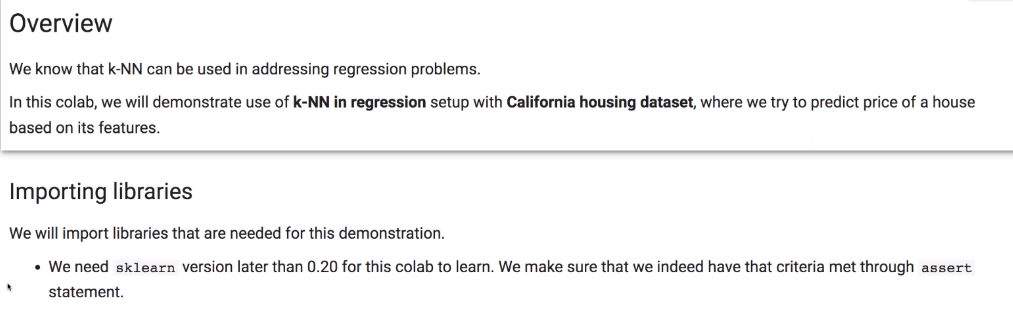

In [1]:
# Scikit-Learn version >= 0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

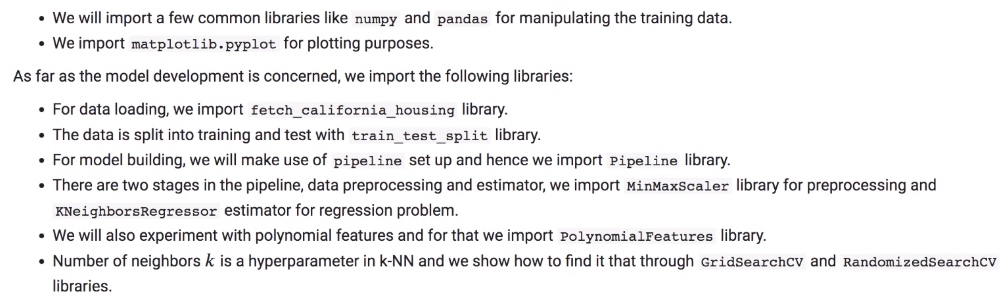

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

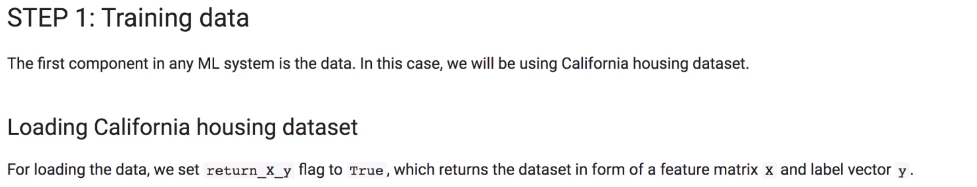

In [4]:
# Download the data
X, y = fetch_california_housing(return_X_y=True)

In [5]:
print('Shape of feature matrix:', X.shape)
print('Shape of label vector:', y.shape)

Shape of feature matrix: (20640, 8)
Shape of label vector: (20640,)


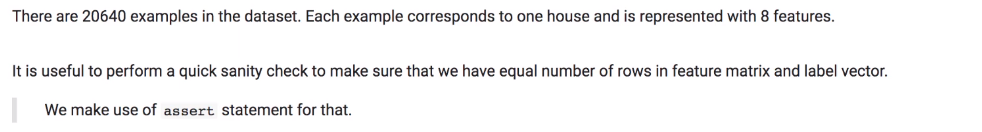

In [6]:
assert(X.shape[0] == y.shape[0])

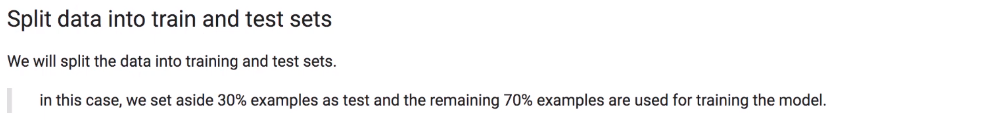

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=8)

In [8]:
print('Shape of trainning feature matrix:', X_train.shape)
print('Shape of test feature matrix:', X_test.shape)

Shape of trainning feature matrix: (14448, 8)
Shape of test feature matrix: (6192, 8)


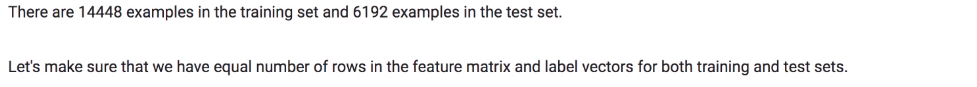

In [9]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])

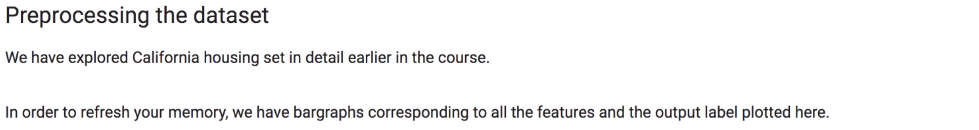

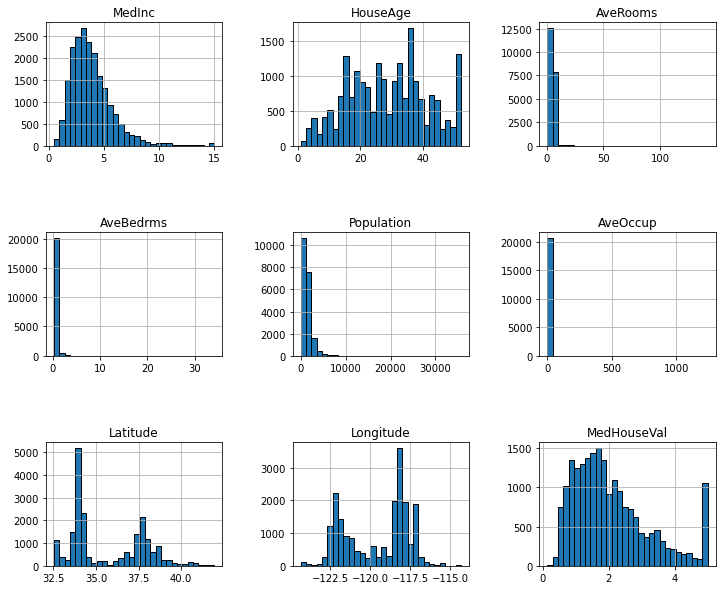

In [10]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.frame.hist(figsize=(12,10), bins=30, edgecolor='black')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

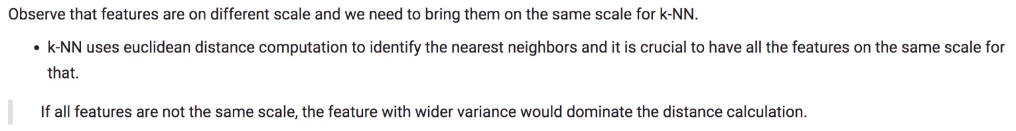
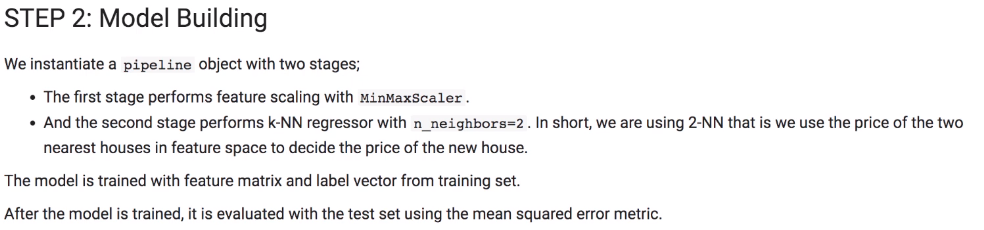

In [11]:
# Create pipeline with min-maxscaler followed by
# KNN regressor
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=2)),
])

# fit and transform trainning data
pipe.fit(X_train, y_train)

# predict
y_pred = pipe.predict(X_test)

# compute RMSE
error = mean_squared_error(y_test, y_pred, squared=False)
print(error)

0.6767822465759739


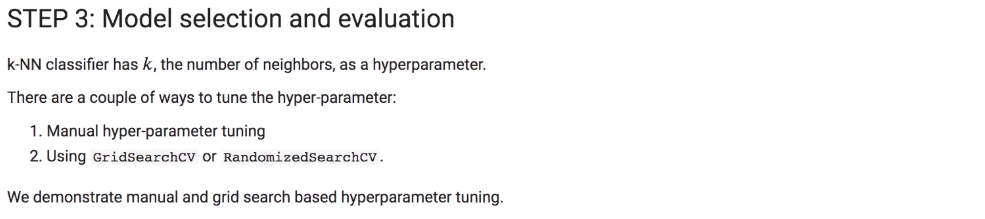
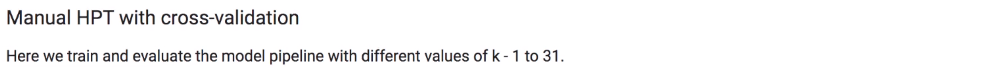

In [12]:
# to store rmse values for different k
rmse_val = []

for K in range(1, 31):
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('knn', KNeighborsRegressor(n_neighbors=K)),
    ])
    
    # fit and transform trainning data
    pipe.fit(X_train, y_train)

    # predict
    y_pred = pipe.predict(X_test)

    # compute RMSE
    error = mean_squared_error(y_test, y_pred, squared=False)
    
    # store rmse values
    rmse_val.append(error)

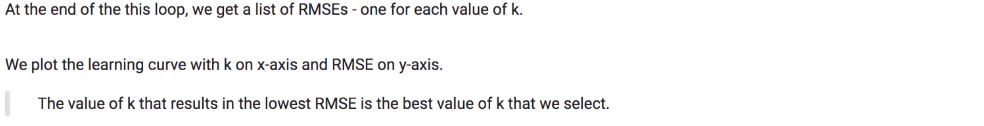

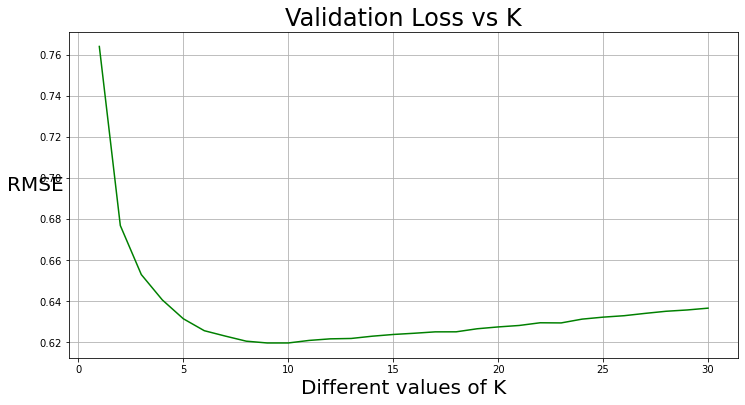

In [17]:
plt.figure(figsize=(12,6))

# plot the rmse values against k values
plt.plot(range(1, len(rmse_val)+1), rmse_val, color='green')
plt.xlabel('Different values of K', fontsize=20)
plt.ylabel('RMSE', fontsize=20, rotation=0)
plt.grid(True)

# displaying the title
plt.title('Validation Loss vs K', fontsize=24)
plt.show()

In [18]:
print('Lowest rmse is for K = {}'.format(np.argmin(rmse_val) + 1))

Lowest rmse is for K = 9


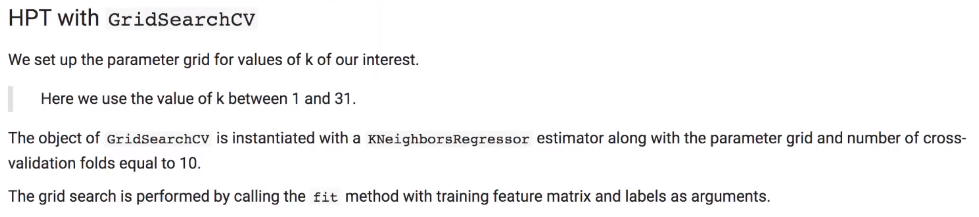

In [19]:
param_grid = {'knn__n_neighbors': list(range(1, 31))}
print(param_grid)

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsRegressor()),
])

# validate model with these parameters
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=10, n_jobs=1,
    return_train_score=True
)

gs.fit(X_train, y_train)

reg_knn = gs.best_estimator_
print(reg_knn)  # print the best estimator params

{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])


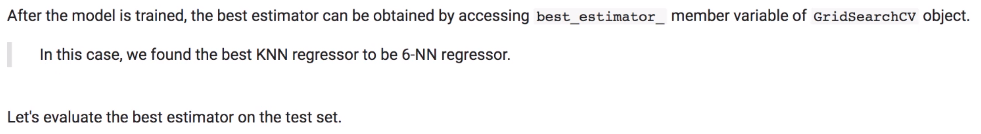

In [21]:
pred = gs.best_estimator_.predict(X_test)
error = mean_squared_error(y_test, pred, squared=False)

print('RMSE value for k is:', error)

RMSE value for k is: 0.6255268557053962


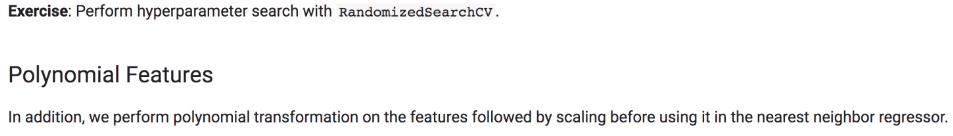

In [23]:
params = {
    'poly__degree': list(range(1, 4)),
    'knn__n_neighbors': list(range(6, 12))
}
print('params:', params)

pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures()),
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsRegressor()),
])

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    cv=10, n_jobs=-1
)

gs.fit(X_train, y_train)
reg_knn = gs.best_estimator_
print(reg_knn)

params: {'poly__degree': [1, 2, 3], 'knn__n_neighbors': [6, 7, 8, 9, 10, 11]}
Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])


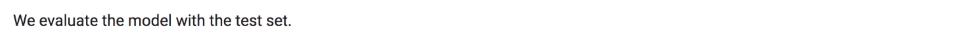

In [24]:
pred = gs.best_estimator_.predict(X_test) 
error = mean_squared_error(y_test, pred, squared=False)
print('RMSE value for k is:', error)

RMSE value for k is: 0.6255268557053962
